## Downloading the Data

In [0]:
!pip install fastai==0.7.0
import sys
!{sys.executable} -m pip install torchtext==0.2.3
!pip install torch==0.4

In [7]:
!curl 'https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar' -o 'VOCtrainval_06-Nov-2007.tar' -H 'Connection: keep-alive' -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'Upgrade-Insecure-Requests: 1' -H 'DNT: 1' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3735.0 Safari/537.36' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'Accept-Encoding: gzip, deflate, br' -H 'Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,bn;q=0.7' -H 'Cookie: __utmc=134107727; __utmz=134107727.1553054465.2.2.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utma=134107727.205412972.1553047529.1553054465.1553930584.3; __utmt=1; __utmb=134107727.1.10.1553930584' --compressed

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  438M  100  438M    0     0  8843k      0  0:00:50  0:00:50 --:--:-- 22.5M


In [8]:
!curl 'https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar' -o 'VOCtest_06-Nov-2007.tar' -H 'Connection: keep-alive' -H 'Pragma: no-cache' -H 'Cache-Control: no-cache' -H 'Upgrade-Insecure-Requests: 1' -H 'DNT: 1' -H 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3735.0 Safari/537.36' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'Accept-Encoding: gzip, deflate, br' -H 'Accept-Language: en-GB,en;q=0.9,en-US;q=0.8,bn;q=0.7' -H 'Cookie: __utmc=134107727; __utmz=134107727.1553054465.2.2.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utma=134107727.205412972.1553047529.1553054465.1553930584.3; __utmt=1; __utmb=134107727.1.10.1553930584' --compressed

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  430M  100  430M    0     0  21.1M      0  0:00:20  0:00:20 --:--:-- 22.9M


In [9]:
!ls

sample_data  VOCtest_06-Nov-2007.tar  VOCtrainval_06-Nov-2007.tar


In [0]:
!tar -xvf VOCtrainval_06-Nov-2007.tar

In [0]:
!tar -xvf 'VOCtest_06-Nov-2007.tar'

In [0]:
!curl https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip -o PASCAL_VOC.zip

In [0]:
!unzip PASCAL_VOC.zip

In [14]:
!ls PASCAL_VOC

pascal_test2007.json   pascal_train2012.json  pascal_val2012.json
pascal_train2007.json  pascal_val2007.json


In [0]:
!mv VOCdevkit PASCAL_VOC

In [16]:
!ls PASCAL_VOC

pascal_test2007.json   pascal_train2012.json  pascal_val2012.json
pascal_train2007.json  pascal_val2007.json    VOCdevkit


In [0]:
#  ! -rf 'VOCtrainval_06-Nov-2007.tar' 'VOCtest_06-Nov-2007.tar'

## Let's Start

In [0]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

In [2]:
PATH = Path('PASCAL_VOC/')
list(PATH.iterdir())

[PosixPath('PASCAL_VOC/pascal_train2012.json'),
 PosixPath('PASCAL_VOC/VOCdevkit'),
 PosixPath('PASCAL_VOC/pascal_train2007.json'),
 PosixPath('PASCAL_VOC/pascal_val2012.json'),
 PosixPath('PASCAL_VOC/pascal_val2007.json'),
 PosixPath('PASCAL_VOC/pascal_test2007.json'),
 PosixPath('PASCAL_VOC/tmp')]

In [3]:
trn_j = json.load((PATH/'pascal_train2007.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [4]:
IMAGES, ANNOTATION, CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'id': 12, 'width': 500},
 {'file_name': '000017.jpg', 'height': 364, 'id': 17, 'width': 480},
 {'file_name': '000023.jpg', 'height': 500, 'id': 23, 'width': 334},
 {'file_name': '000026.jpg', 'height': 333, 'id': 26, 'width': 500},
 {'file_name': '000032.jpg', 'height': 281, 'id': 32, 'width': 500}]

In [5]:
trn_j[ANNOTATION][:2]

[{'area': 34104,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0,
  'image_id': 12,
  'iscrowd': 0,
  'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]]},
 {'area': 13110,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0,
  'image_id': 17,
  'iscrowd': 0,
  'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]]}]

In [6]:
trn_j[CATEGORIES][:4]

[{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'none'},
 {'id': 3, 'name': 'bird', 'supercategory': 'none'},
 {'id': 4, 'name': 'boat', 'supercategory': 'none'}]

In [0]:
FILE_NAME, ID, IMG_ID, CAT_ID, BBOX = 'file_name', 'id', 'image_id', 'category_id', 'bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [8]:
list((PATH/'VOCdevkit'/'VOC2007').iterdir())

[PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/SegmentationClass'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/ImageSets'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/SegmentationObject'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/Annotations'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages')]

In [0]:
JPEGS = 'VOCdevkit/VOC2007/JPEGImages'

In [10]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/001205.jpg'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/008371.jpg'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/007926.jpg'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/001778.jpg'),
 PosixPath('PASCAL_VOC/VOCdevkit/VOC2007/JPEGImages/007932.jpg')]

In [11]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME], im0_d[ID]

('000012.jpg', 12)

In [12]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda: [])
for o in trn_j[ANNOTATION]:
  if not o['ignore']:
    bb = o[BBOX]
    bb = hw_bb(bb)
    trn_anno[o[IMG_ID]].append((bb, o[CAT_ID]))
    
len(trn_anno)

2501

In [13]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [14]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [15]:
cats[7]

'car'

In [16]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [17]:
cats[15], cats[13]

('person', 'horse')

In [0]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [0]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [20]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

In [0]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

In [0]:
def show_img(im, figsize=None, ax=None):
  if not ax:
    fig, ax = plt.subplots(figsize=figsize)
  ax.imshow(im)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  return ax

In [0]:
def draw_outline(o, lw):
  o.set_path_effects([patheffects.Stroke(
      linewidth=lw, foreground='black'), patheffects.Normal()
  ])

In [0]:
def draw_rect(ax, b):
  patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
  draw_outline(patch, 4)

In [0]:
def draw_text(ax, xy, txt, sz=14):
  text = ax.text(*xy, txt, verticalalignment='top', color='white', fontsize=sz, weight='bold')
  draw_outline(text, 1)

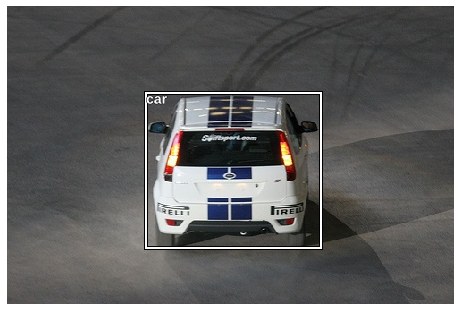

In [26]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [0]:
def draw_im(im, ann):
  ax = show_img(im, figsize=(16, 8))
  for b, c in ann:
    b = bb_hw(b)
    draw_rect(ax, b)
    draw_text(ax, b[:2], cats[c], sz=16)

In [0]:
def draw_idx(i):
  im_a = trn_anno[i]
  im = open_image(IMG_PATH/trn_fns[i])
  print(im.shape)
  draw_im(im, im_a)

(364, 480, 3)


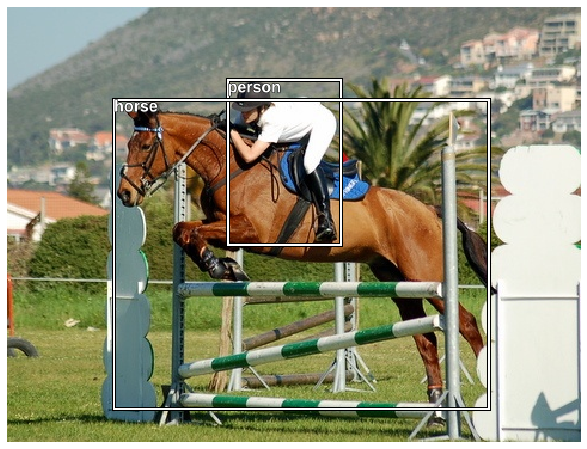

In [29]:
draw_idx(17)

In [0]:
def get_lrg(b):
  if not b: raise Exception()
  b = sorted(b, key=lambda x: np.product(x[0][-2:] - x[0][:2]), reverse=True)
  return b[0]

In [0]:
trn_lrg_anno = {a: get_lrg(b) for a, b in trn_anno.items()}

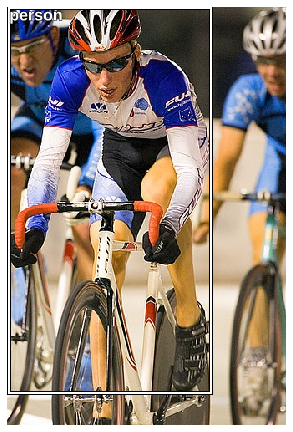

In [32]:
b, c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[23]), figsize=(5, 10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

In [0]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [0]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
                   'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]},
                   columns=['fn', 'cat'])
df.to_csv(CSV, index=False)

In [0]:
f_model = resnet34
sz = 224
bs = 64

In [0]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)

In [0]:
x, y = next(iter(md.val_dl))

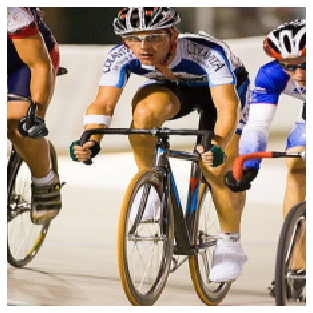

In [38]:
show_img(md.val_ds.denorm(to_np(x))[0])

In [0]:
# !pip install torch==0.4

In [40]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 100148370.57it/s]
/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [41]:
lrf=learn.lr_find(1e-5,100)

 78%|███████▊  | 25/32 [00:18<00:05,  1.37it/s, loss=10.1]

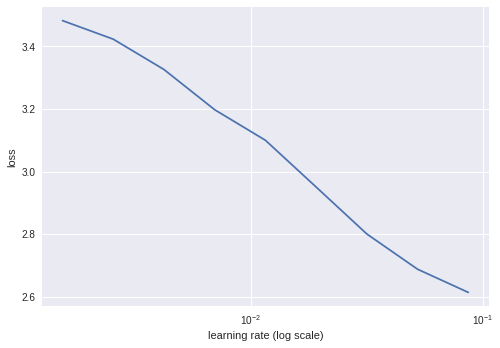

In [42]:
learn.sched.plot()

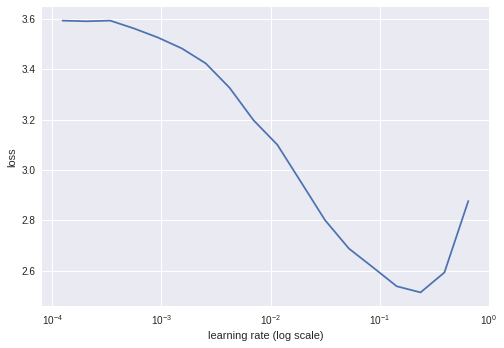

In [44]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [0]:
lr = 2e-2

In [46]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      1.28712    0.605961   0.832     


[0.6059609949588776, 0.8319999990463257]

In [0]:
lrs = np.array([lr/1000, lr/100, lr])

In [0]:
learn.freeze_to(-2)

 84%|████████▍ | 27/32 [00:22<00:02,  1.73it/s, loss=3.7] 

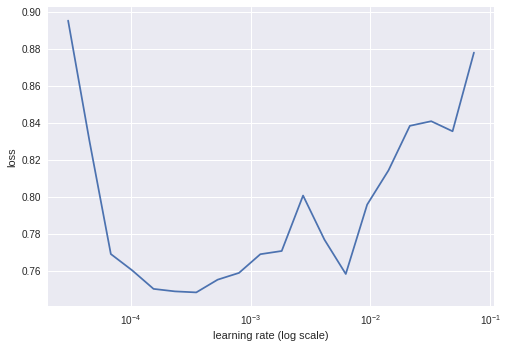

In [51]:
lrf = learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [52]:

learn.fit(lrs/5, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.796258   0.582529   0.824     


[0.5825287616252899, 0.8239999976158142]

In [0]:
learn.unfreeze()

In [54]:
learn.fit(lrs/5, 1, cycle_len=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.638872   0.588088   0.818     
    1      0.44505    0.550919   0.838     


[0.5509191808700562, 0.8379999990463257]

In [0]:
learn.save('clas_one')

In [0]:
learn.load('clas_one')

In [0]:
x, y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x, preds = to_np(x), to_np(probs)
preds = np.argmax(preds, -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


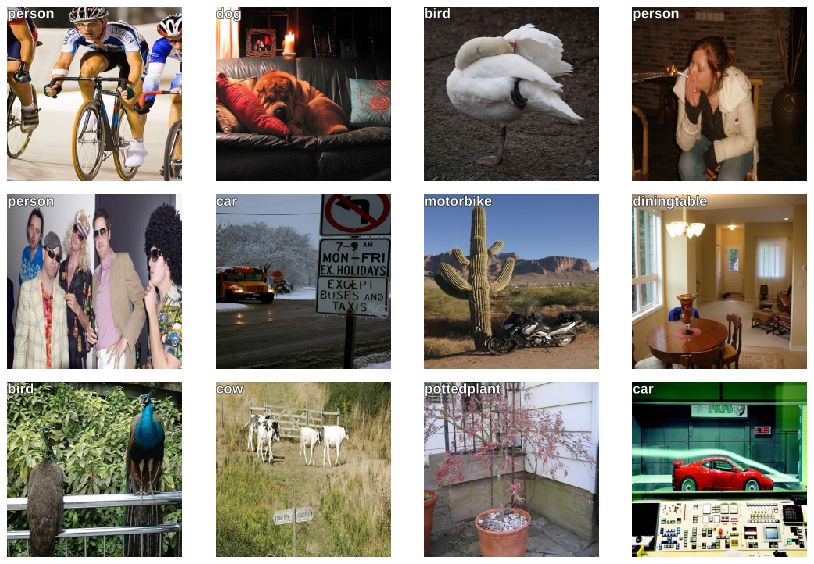

In [58]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
  ima = md.val_ds.denorm(x)[i]
  b = md.classes[preds[i]]
  ax = show_img(ima, ax=ax)
  draw_text(ax, (0, 0), b)
plt.tight_layout()

In [0]:
BB_CSV = PATH/'tmp/bb.csv'

In [0]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
                   'bbox': bbs}, columns=['fn', 'bbox'])
df.to_csv(BB_CSV, index=False)

In [63]:
BB_CSV.open().readlines()[:5]

['fn,bbox\n',
 '000012.jpg,96 155 269 350\n',
 '000017.jpg,77 89 335 402\n',
 '000023.jpg,1 2 461 242\n',
 '000026.jpg,124 89 211 336\n']

In [0]:
f_model=resnet34
sz=224
bs=64

In [0]:
augs = [RandomFlip(),
        RandomRotate(30),
        RandomLighting(0.1, 0.1)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]
[115.  63. 241. 312.]


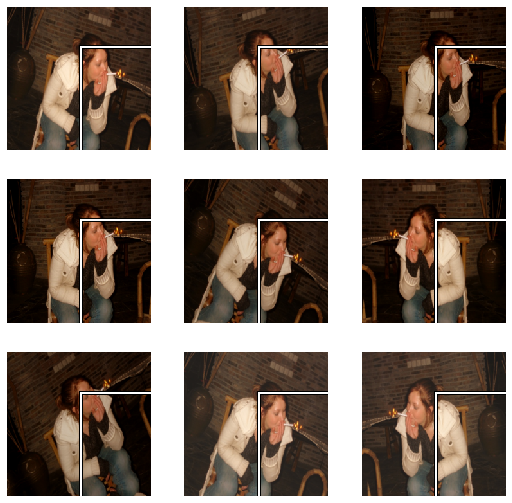

In [71]:
idx = 3
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
  x, y = next(iter(md.aug_dl))
  ima = md.val_ds.denorm(to_np(x))[idx]
  b = bb_hw(to_np(y[idx]))
  print(b)
  show_img(ima, ax=ax)
  draw_rect(ax, b)

In [0]:
augs = [RandomFlip(tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        RandomLighting(0.1, 0.1, tfm_y=TfmType.COORD)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

[ 52.  38. 106. 183.]
[ 49.  15. 148. 208.]
[ 52.  38. 106. 183.]
[ 48.  34. 113. 189.]
[ 52.  28. 128. 195.]
[ 40.  26. 136. 197.]
[ 45.  24. 139. 199.]
[ 34.  19. 155. 204.]
[ 66.  38. 105. 183.]


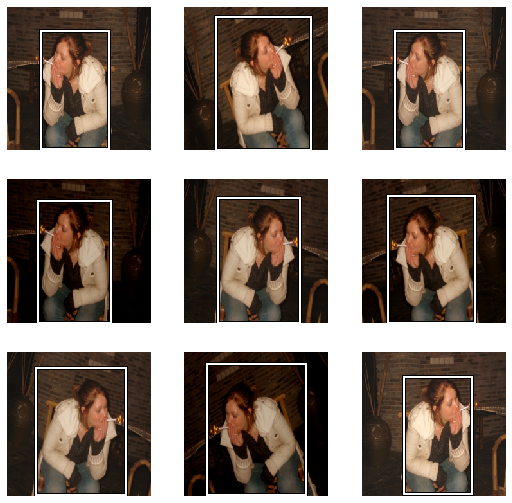

In [76]:
idx = 3
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
  x, y = next(iter(md.aug_dl))
  ima = md.val_ds.denorm(to_np(x))[idx]
  b = bb_hw(to_np(y[idx]))
  print(b)
  show_img(ima, ax=ax)
  draw_rect(ax, b)

In [0]:
tfm_y=TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05, 0.05, tfm_y=tfm_y)]

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=tfm_y, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

In [0]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088, 4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [81]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(9408))])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(128))])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape

 58%|█████▊    | 291/501 [00:22<00:12, 17.37it/s, loss=166]

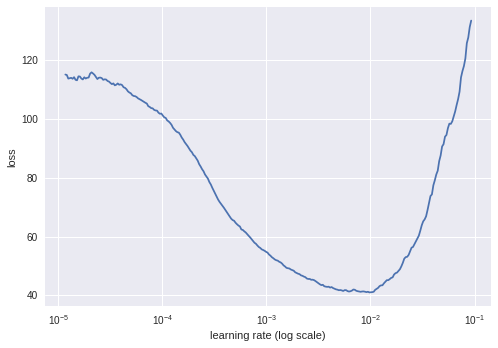

In [82]:
learn.lr_find(1e-5, 100)
learn.sched.plot(5)

In [0]:
lr = 2e-3

In [84]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      28.022477  26.71513  
    1      28.388461  29.31407  
    2      21.849286  26.073921 


[26.073921073913574]

In [0]:
lrs = np.array([lr/100, lr/10, lr])

In [0]:
learn.freeze_to(-2)

 97%|█████████▋| 485/501 [00:55<00:02,  7.47it/s, loss=101]

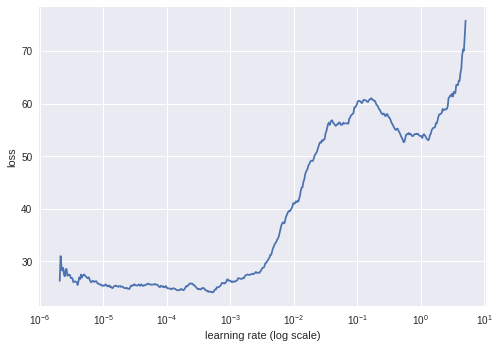

In [87]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [88]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      25.617194  26.217182 
    1      27.957083  27.235425 
    2      20.148115  21.785461 


[21.785460502624513]

In [0]:
learn.freeze_to(-3)

In [90]:
learn.fit(lrs, 1, cycle_len=2)

epoch      trn_loss   val_loss   
    0      28.680325  28.54991  
    1      20.202593  22.25797  


[22.257970420837403]

In [0]:

learn.save('reg4')

In [0]:

learn.load('reg4')

In [0]:
x, y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

[ 66.  38. 105. 183.]
[ 49.  35. 111. 188.]
[ 66.  38. 105. 183.]
[ 52.  38. 106. 183.]
[ 65.  38. 106. 183.]
[ 62.  35. 111. 188.]
[ 52.  37. 107. 185.]
[ 64.  35. 110. 188.]
[ 52.  38. 106. 183.]


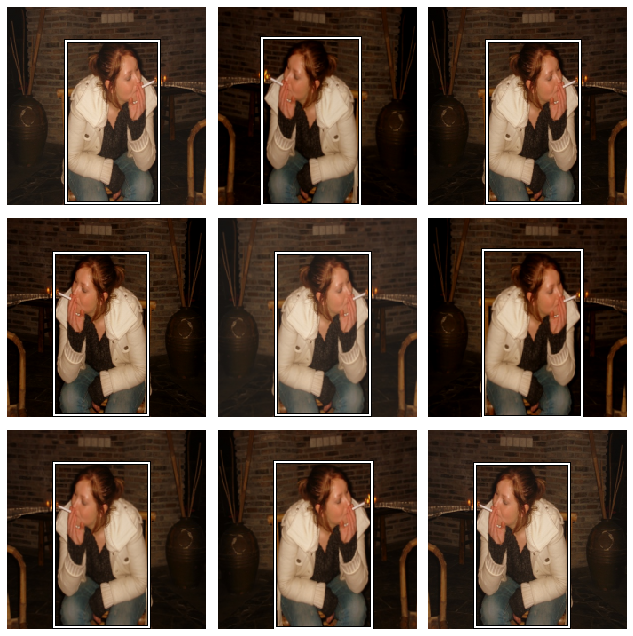

In [94]:
idx = 3
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
  x, y = next(iter(md.aug_dl))
  ima = md.val_ds.denorm(to_np(x))[idx]
  b = bb_hw(to_np(y[idx]))
  print(b)
  show_img(ima, ax=ax)
  draw_rect(ax, b)
plt.tight_layout()

In [0]:
f_model = resnet34
sz=224
bs=64

val_idxs = get_cv_idxs(len(trn_fns))

In [0]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,
   bs=bs, continuous=True, val_idxs=val_idxs)

In [0]:
md2 = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms_from_model(f_model, sz))

In [0]:
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2): self.ds,self.y2 = ds,y2
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))

In [0]:
trn_ds2 = ConcatLblDataset(md.trn_ds, md2.trn_y)
val_ds2 = ConcatLblDataset(md.val_ds, md2.val_y)

In [138]:
val_ds2[0][1]

(array([  0.,  49., 205., 180.], dtype=float32), 14)

In [0]:

md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2

In [140]:

x,y=next(iter(md.val_dl))
idx=3
ima=md.val_ds.ds.denorm(to_np(x))[idx]
b = bb_hw(to_np(y[0][idx])); b

array([ 52.,  38., 107., 185.])

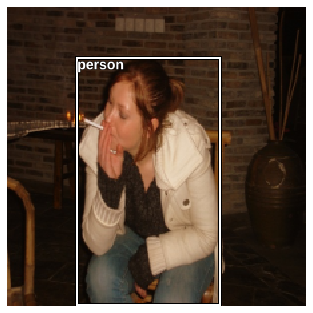

In [141]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[y[1][idx]])

In [0]:

head_reg4 = nn.Sequential(
    Flatten(),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(25088,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256,4+len(cats)),
)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)

learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam

In [0]:

def detn_loss(input, target):
    bb_t,c_t = target
    bb_i,c_i = input[:, :4], input[:, 4:]
    bb_i = F.sigmoid(bb_i)*224
    # I looked at these quantities separately first then picked a multiplier
    #   to make them approximately equal
    return F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*20

def detn_l1(input, target):
    bb_t,_ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*224
    return F.l1_loss(V(bb_i),V(bb_t)).data

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:, 4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]

 94%|█████████▍| 30/32 [00:27<00:00,  2.20it/s, loss=407]

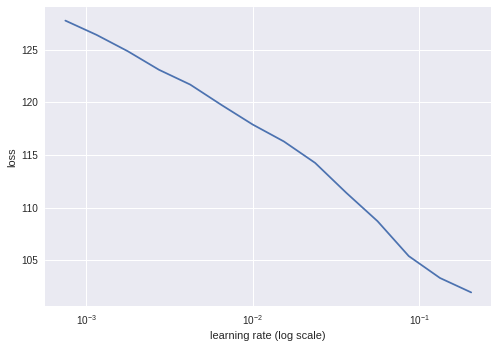

In [144]:
learn.lr_find()
learn.sched.plot()

In [0]:
lr=1e-2

In [146]:
learn.fit(lr, 1, cycle_len=3, use_clr=(32,5))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      74.758858  45.842446  0.804      32.613406 
    1      54.040154  36.740854  0.812      25.394328 
    2      44.877625  35.719721  0.82       24.768705 


[35.719721099853516, 0.8199999995231628, 24.768705169677734]

In [0]:
learn.save('reg1_0')

In [0]:
learn.freeze_to(-2)

In [0]:
lrs = np.array([lr/100, lr/10, lr])

 91%|█████████ | 29/32 [00:29<00:01,  1.52it/s, loss=211]

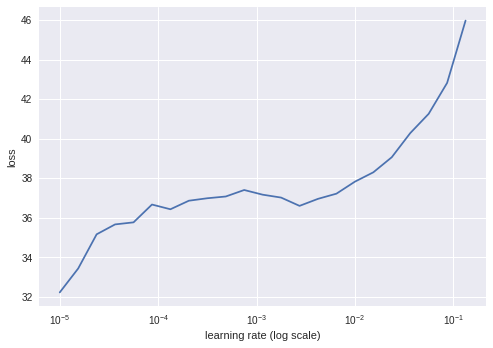

In [150]:

learn.lr_find(lrs/1000)
learn.sched.plot(0)

In [151]:
learn.fit(lrs/5, 1, cycle_len=5, use_clr=(32,10))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      36.768645  35.286455  0.806      22.801466 
    1      31.779603  33.141669  0.806      21.060771 
    2      27.403148  30.769684  0.836      20.001908 
    3      24.190785  30.831277  0.814      19.695724 
    4      21.670113  30.729358  0.814      19.583721 


[30.729358047485352, 0.8139999980926513, 19.583721343994142]

In [0]:
learn.save('reg1_1')

In [0]:

learn.load('reg1_1')

In [0]:

learn.unfreeze()

In [155]:

learn.fit(lrs/10, 1, cycle_len=10, use_clr=(32,10))

epoch      trn_loss   val_loss   detn_acc   detn_l1    
    0      18.486412  31.718964  0.814      19.877285 
    1      18.117488  32.055978  0.822      19.483218 
    2      17.54115   32.146668  0.812      19.737177 
    3      16.787794  30.67898   0.838      19.03469  
    4      15.861839  30.912939  0.822      18.776209 
    5      15.075833  29.730756  0.842      18.548987 
    6      14.336263  29.720754  0.838      18.509307 
    7      13.86021   29.887173  0.824      18.269794 
    8      13.512273  29.0953    0.826      18.161384 
    9      12.810587  29.24718   0.828      18.129908 


[29.247180450439455, 0.8279999995231628, 18.129907669067382]

In [0]:
learn.save('reg1')

In [0]:
learn.load('reg1')

In [0]:
y = learn.predict()
x,_ = next(iter(md.val_dl))

In [0]:

from scipy.special import expit

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


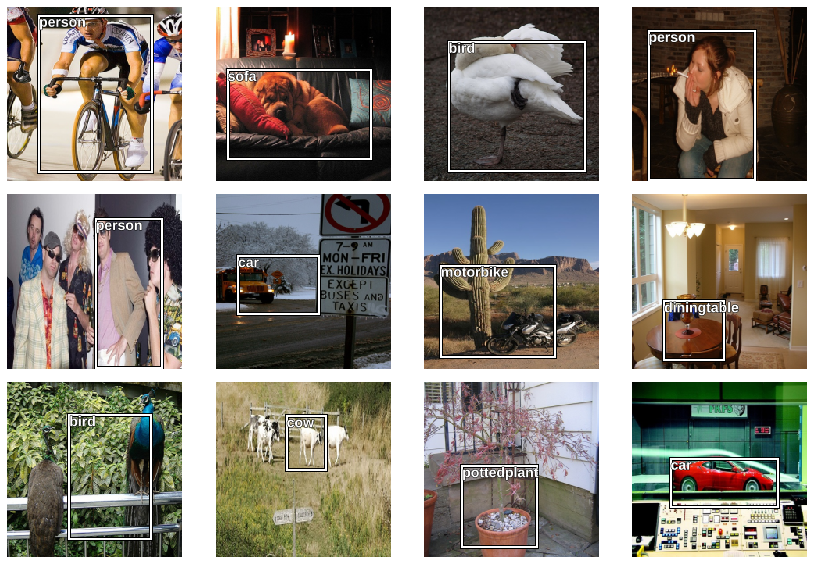

In [160]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.ds.denorm(to_np(x))[i]
    bb = expit(y[i][:4])*224
    b = bb_hw(bb)
    c = np.argmax(y[i][4:])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
    draw_text(ax, b[:2], md2.classes[c])
plt.tight_layout()